In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from extract_features_examples import find_midpoint_v4, get_asymmetry, crop, measure_blue_veil
import cv2

In [35]:
def measure_blue_veil(image):
    height, width, _ = image.shape
    count = 0

    for y in range(height):
        for x in range(width):
            b, g, r = image[y, x][:3]*100 ## quite important, otherwise it breaks with some images
            #print(b,g,r)

            if b > 60 and (r - 46 < g) and (g < r + 15):
                count += 1

    return count/(height*width)

measure_blue_veil(plt.imread(r"C:\Users\MATEJ\Documents\BDS SEMESTER 2\Projects in Data Science\Project\data\data\img_0069.png",cv2.IMREAD_COLOR))

0.9869882089120371

In [3]:
df=pd.DataFrame({'img_id':range(200)})
filepath=r"C:\Users\MATEJ\Documents\BDS SEMESTER 2\Projects in Data Science\Project\data\data\img_0000"
# for i in range(200):
#     img=filepath[:-len(str(i))]+str(i)+'.png'
#     im = plt.imread(img)
#     df.loc[i,'blue_veil']=measure_blue_veil(im)

In [4]:
# TODO: get_com_col (not happening), crop (needs hair removed??), cut_im_by_mask (could use hair removed), 
# rotation_asymmetry (what does n mean), worst_asymmetry (done), get_relative_rgb_means (done)

In [5]:
## REMOVE HAIR
import cv2

def removeHair(img_org, img_gray, kernel_size=25, threshold=0.05, radius=3.0):
    # kernel for the morphological filtering
    kernel = cv2.getStructuringElement(cv2.MORPH_CROSS, (kernel_size, kernel_size))

    # perform the blackHat filtering on the grayscale image to find the hair countours
    blackhat = cv2.morphologyEx(img_gray, cv2.MORPH_BLACKHAT, kernel)

    # intensify the hair countours in preparation for the inpainting algorithm
    _, thresh = cv2.threshold(blackhat, threshold, 255, cv2.THRESH_BINARY)
    thresh = thresh.astype(np.uint8) #chatgpt fix, otherwise it wouldn't work

    # inpaint the original image depending on the mask
    img_out = cv2.inpaint(img_org, thresh, radius, cv2.INPAINT_TELEA)

    return blackhat, thresh, img_out

In [6]:
## REMOVE HAIR GPT
def removeHair2(img_org, img_gray, kernel_size=17, radius=3.0):
    # Ensure input is 3-channel
    if len(img_org.shape) == 2 or img_org.shape[2] != 3:
        img_org = cv2.cvtColor(img_org, cv2.COLOR_GRAY2BGR)

    # Apply slight blur to reduce noise
    img_gray_blur = cv2.GaussianBlur(img_gray, (5, 5), 0)

    # Use blackhat morphology to detect dark hair on lighter background
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (kernel_size, kernel_size))
    blackhat = cv2.morphologyEx(img_gray_blur, cv2.MORPH_BLACKHAT, kernel)

    # Use Otsu's thresholding to automatically select a good threshold
    _, thresh = cv2.threshold(blackhat, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    # Inpaint using the thresholded hair mask
    img_out = cv2.inpaint(img_org, thresh, radius, cv2.INPAINT_TELEA)

    return blackhat, thresh, img_out


In [7]:
## MASK FUNCTION
from skimage.color import rgb2gray
from skimage.filters import gaussian, threshold_otsu
def get_mask(image):
    gray_im = rgb2gray(image)
    blurred_im = gaussian(gray_im, sigma=1.0)
    t=threshold_otsu(blurred_im)
    mask = gray_im<t
    return mask

### get_com_col
helper function for get_multicolor_rate

In [34]:
from extract_features_examples import get_com_col, get_multicolor_rate
im=(plt.imread(r"C:\Users\MATEJ\Documents\BDS SEMESTER 2\Projects in Data Science\Project\data\data\img_0015.png",cv2.IMREAD_COLOR)*255).astype(int)
mask=get_mask(im)
multi_color_rate=get_multicolor_rate(im,mask,9)
multi_color_rate

4.599137066629461e-06

### crop
pretty sure this needs the hair removed to work at all

(-0.5, 173.5, 147.5, -0.5)

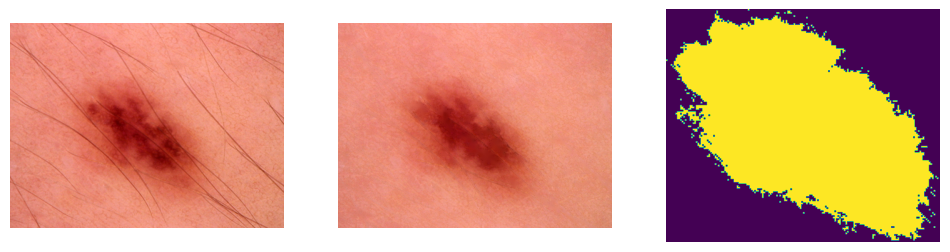

In [ ]:
from extract_features_examples import crop
im=(plt.imread(r"C:\Users\MATEJ\Documents\BDS SEMESTER 2\Projects in Data Science\Project\data\data\img_0007.png",cv2.IMREAD_COLOR)*255).astype(np.uint8)
# assert im.ndim == 3 and im.shape[2] == 3 #img_org must be a 3-channel image
# print(im.dtype)
# assert im.dtype == np.uint8 #img_org must be of type uint8
mask=get_mask(im)

gray_im = rgb2gray(im)
blackhat,thresh,im_hairless=removeHair(im,gray_im)
mask_hairless=get_mask(im_hairless)

cropped_mask=crop(mask_hairless)

fig, ax = plt.subplots(1, 3, figsize=(12, 6))
ax[0].imshow(im)
ax[0].axis('off')
ax[1].imshow(im_hairless)
ax[1].axis('off')
ax[2].imshow(cropped_mask)
ax[2].axis('off')

### cut_im_by_mask
works best when used without hair

(-0.5, 192.5, 266.5, -0.5)

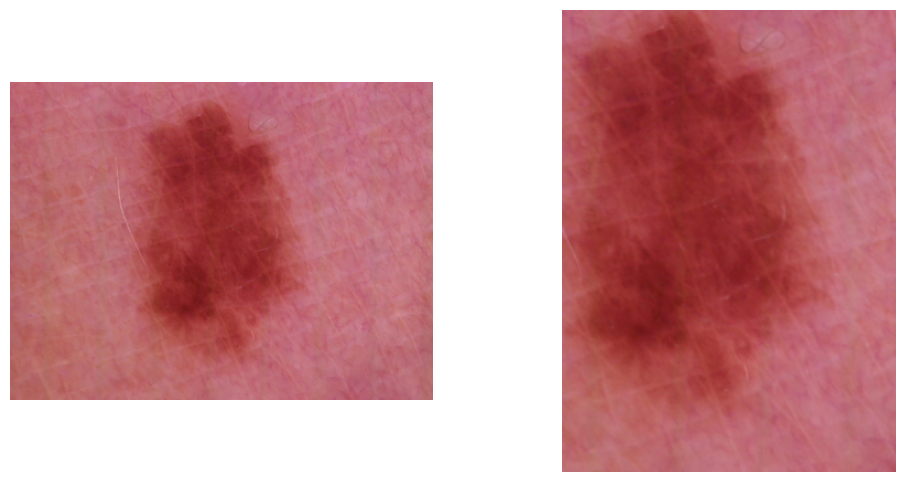

In [ ]:
from extract_features_examples import cut_im_by_mask
im=(plt.imread(r"C:\Users\MATEJ\Documents\BDS SEMESTER 2\Projects in Data Science\Project\data\data\img_0015.png",cv2.IMREAD_COLOR)*255).astype(int)
mask=get_mask(im)

fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].imshow(im)
ax[0].axis('off')
ax[1].imshow(cut_im_by_mask(im,mask))
ax[1].axis('off')

ValueError: the input array must have size 3 along `channel_axis`, got (380, 384, 4)

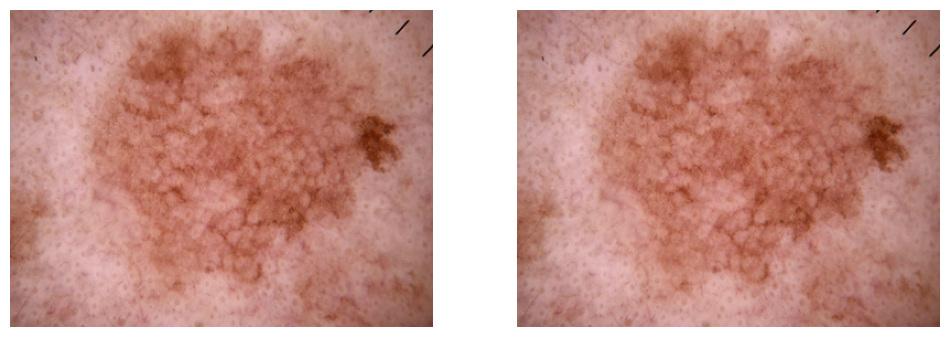

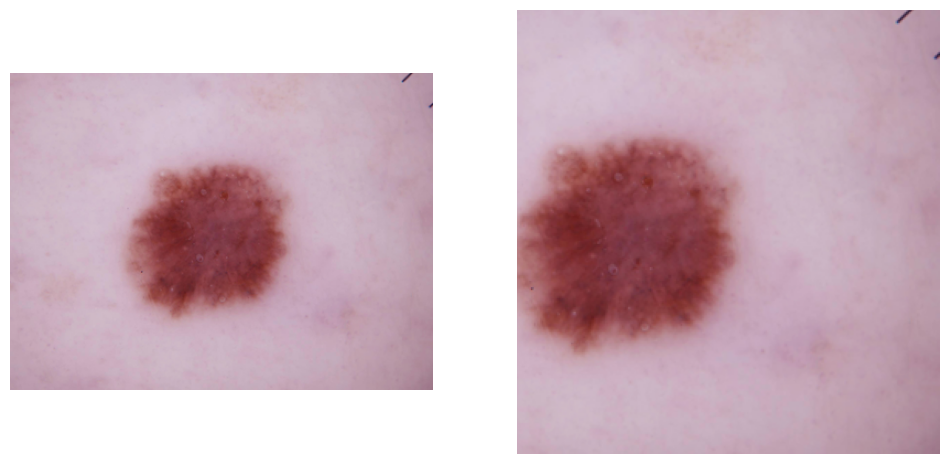

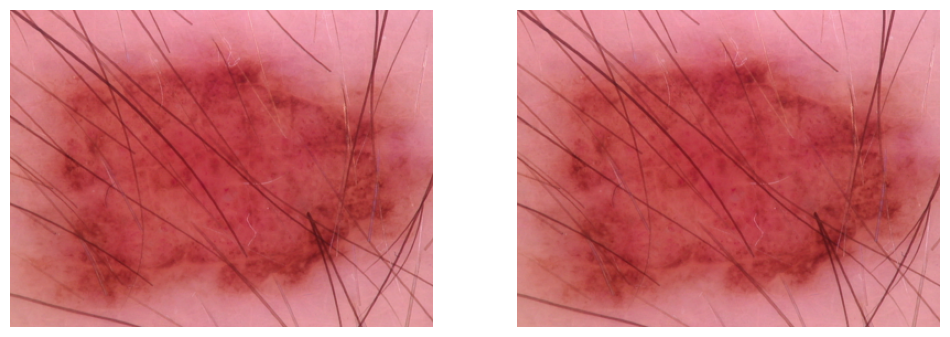

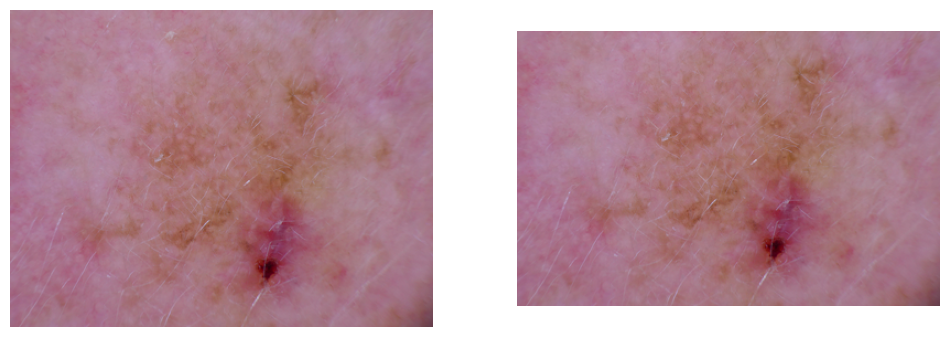

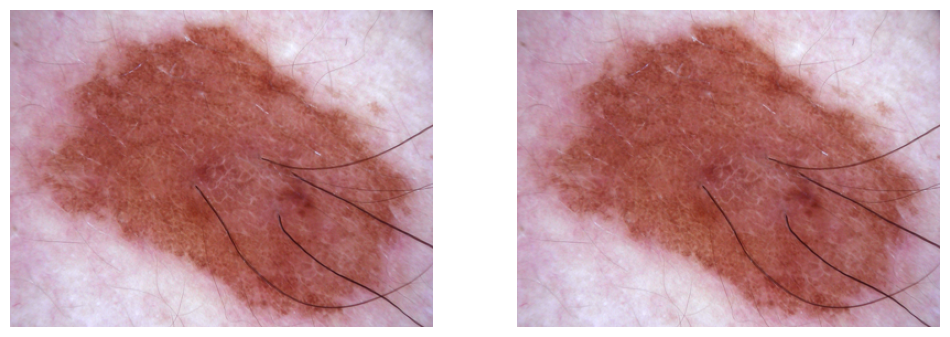

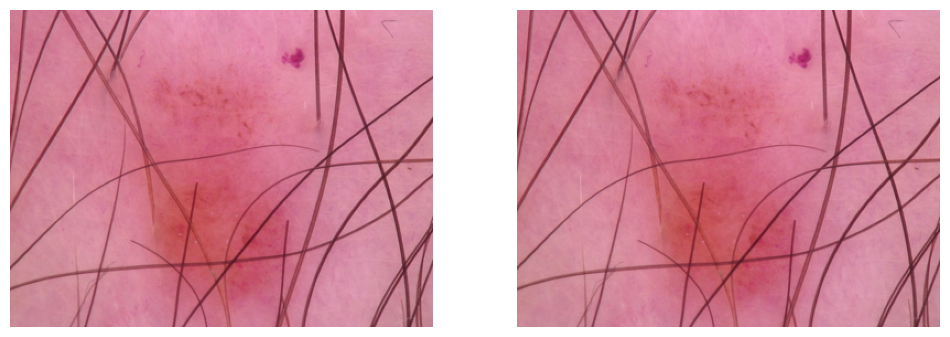

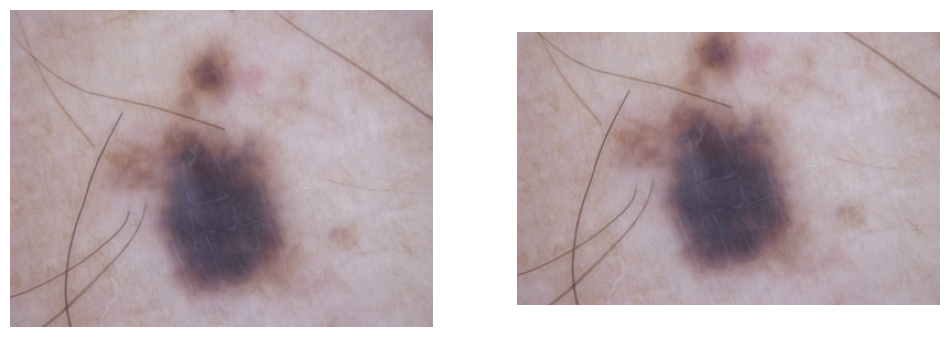

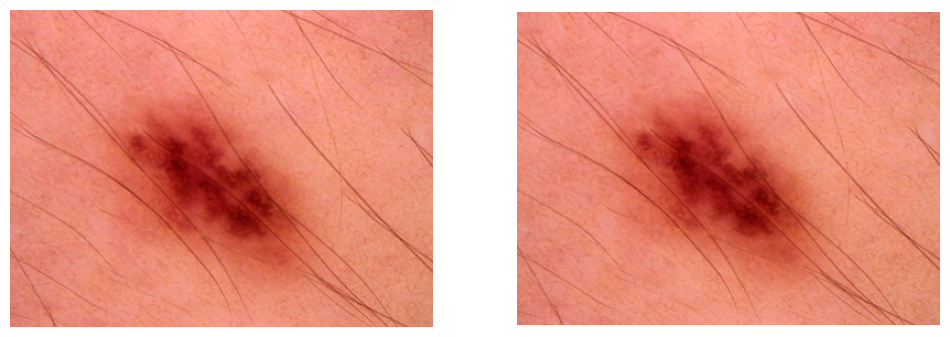

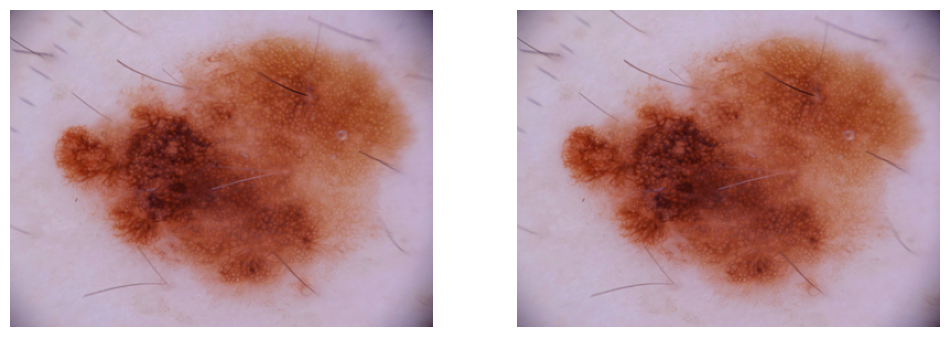

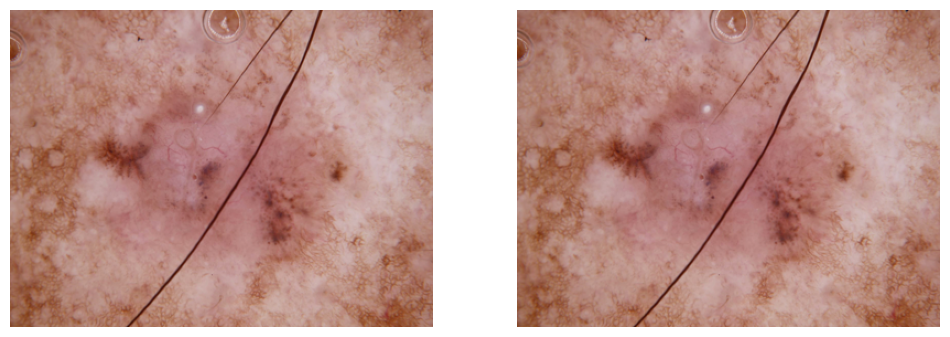

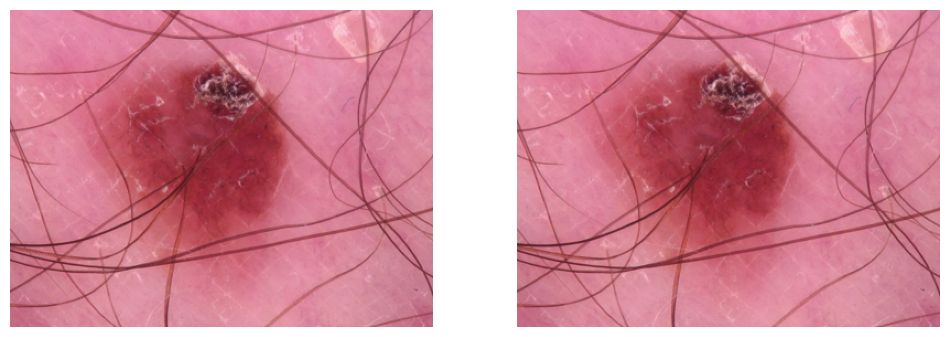

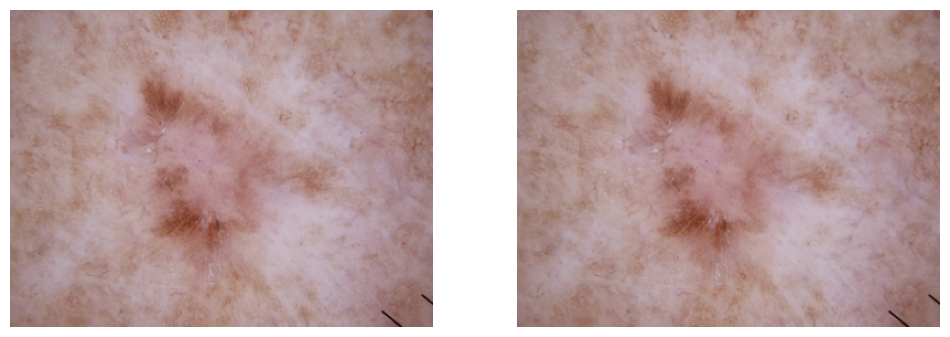

In [ ]:
from extract_features_examples import cut_im_by_mask

n=20
#fig, ax = plt.subplots(10, 2, figsize=(12, 6))
filepath=r"C:\Users\MATEJ\Documents\BDS SEMESTER 2\Projects in Data Science\Project\data\data\img_0000"
for i in range(n):
    img=filepath[:-len(str(i))]+str(i)+'.png'
    im = (plt.imread(img,cv2.IMREAD_COLOR)*255).astype(int)
    mask=get_mask(im)
    fig, ax = plt.subplots(1, 2, figsize=(12, 6))
    ax[0].imshow(im)
    ax[0].axis('off')
    ax[1].imshow(cut_im_by_mask(im,mask))
    ax[1].axis('off')

### rotation_asymmetry
what does n mean

In [ ]:
from extract_features_examples import rotation_asymmetry
im=(plt.imread(r"C:\Users\MATEJ\Documents\BDS SEMESTER 2\Projects in Data Science\Project\data\data\img_0006.png",cv2.IMREAD_COLOR)*255).astype(int)
mask=get_mask(im)
n=10 ## seriously what does n mean, 10 is a random guess
rotation_asymmetry(mask,n)

{0.0: 0.3367,
 9.0: 0.3737,
 18.0: 0.4722,
 27.0: 0.495,
 36.0: 0.4876,
 45.0: 0.57,
 54.0: 0.6055,
 63.0: 0.6509,
 72.0: 0.6806,
 81.0: 0.5755}

### worst_asymmetry
at least something works, thank god

In [ ]:
from extract_features_examples import worst_asymmetry
im=(plt.imread(r"C:\Users\MATEJ\Documents\BDS SEMESTER 2\Projects in Data Science\Project\data\data\img_0006.png",cv2.IMREAD_COLOR)*255).astype(int)
mask=get_mask(im)
worst_asymmetry(mask)

0.6818

### get_relative_rgb_means
works, no clue what the values mean

(0.3427402269000761,
 0.32909486949018285,
 0.328164903609741,
 15.84649206090856,
 6.176726164641195,
 5.5177069769965215)

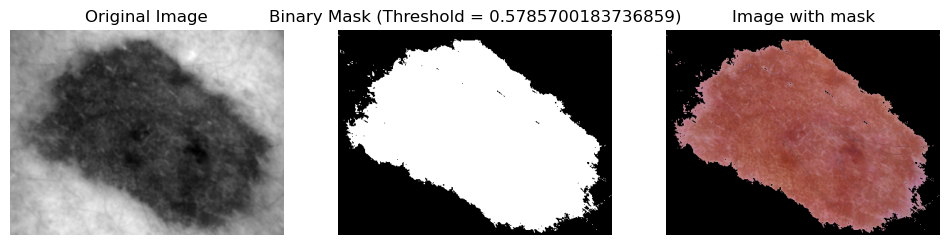

In [61]:
from extract_features_examples import get_relative_rgb_means, slic_segmentation
from skimage.color import rgb2gray
from skimage.filters import gaussian, threshold_otsu

im=(plt.imread(r"C:\Users\MATEJ\Documents\BDS SEMESTER 2\Projects in Data Science\Project\data\data\img_0004.png",cv2.IMREAD_COLOR)*255).astype(np.uint8)
im_np = np.array(im, dtype=np.uint8)

gray_im = rgb2gray(im)
blackhat,thresh,im_hairless=removeHair(im,gray_im) # uses the removeHair function
mask_hairless=get_mask(im_hairless)

gray_im = rgb2gray(im_hairless)
blurred_im = gaussian(gray_im, sigma=1.0)
t=threshold_otsu(blurred_im)
mask = gray_im<t

fig, ax = plt.subplots(1, 3, figsize=(12, 6))
ax[0].imshow(blurred_im, cmap='gray')
ax[0].set_title('Original Image')
ax[0].axis('off')

# VERY IMPORTANT
#mask = (mask * 255) #is it?

ax[1].imshow(mask, cmap='gray')
ax[1].set_title(f'Binary Mask (Threshold = {t})')
ax[1].axis('off')

masked_im=im_hairless.copy()
masked_im[mask==0] = 0

ax[2].imshow(masked_im)
ax[2].set_title(f'Image with mask')
ax[2].axis('off')

slic_seg=slic_segmentation(masked_im,mask)
f1,f2,f3,f10,f11,f12=get_relative_rgb_means(im,slic_seg)
f1,f2,f3,f10,f11,f12

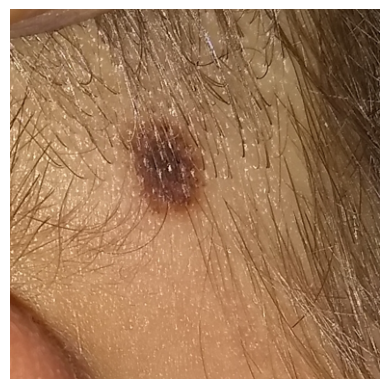

In [58]:
from skimage.color import rgb2gray
from skimage.filters import gaussian, threshold_otsu
import cv2

def removeHair(img_org, img_gray, kernel_size=25, threshold=0.1, radius=3.0):
    # kernel for the morphological filtering
    kernel = cv2.getStructuringElement(cv2.MORPH_CROSS, (kernel_size, kernel_size))

    # perform the blackHat filtering on the grayscale image to find the hair countours
    blackhat = cv2.morphologyEx(img_gray, cv2.MORPH_BLACKHAT, kernel)

    # intensify the hair countours in preparation for the inpainting algorithm
    _, thresh = cv2.threshold(blackhat, threshold, 255, cv2.THRESH_BINARY)
    thresh = thresh.astype(np.uint8) #chatgpt fix, otherwise it wouldn't work

    # inpaint the original image depending on the mask
    img_out = cv2.inpaint(img_org, thresh, radius, cv2.INPAINT_TELEA)

    return blackhat, thresh, img_out

im=(plt.imread(r"C:\Users\MATEJ\Documents\BDS SEMESTER 2\Projects in Data Science\Project\data\data\img_0019.png")*255).astype(np.uint8)
#im_np = np.array(im, dtype=np.uint8)
im = im[..., :3]

gray_im = rgb2gray(im)
blackhat,thresh,im_hairless=removeHair(im,gray_im) # uses the removeHair function
mask_hairless=get_mask(im_hairless)

gray_im = rgb2gray(im_hairless)
blurred_im = gaussian(gray_im, sigma=1.0)
t=threshold_otsu(blurred_im)
mask = gray_im<t

masked_im=im_hairless.copy()
masked_im[mask==0] = 0
plt.imshow(im)
plt.axis('off');